In [1]:
#for run in {1..20}; do python3 mc.py&python3 mc.py&python3 mc.py&python3 mc.py&python3 mc.py&python3 mc.py&python3 mc.py&python3 mc.py&python3 mc.py&python3 mc.py; done

In [ ]:
for run in {1..20}; do python3 mc.py&python3 mc.py&python3 mc.py&python3 mc.py&python3 mc.py; done

In [22]:
from os import listdir
from os.path import isfile, join
import glob
import re
import numpy as np
import sys
sys.path.append('../../')
import bemppUQ

text = glob.glob('./results/*.txt')
S = [re.sub("[^0-9]", "",text) for text in text]
S = np.array(S, dtype=int)

axis=2
#for run in {1..20}; do python3 main.py&python3 main.py&python3 main.py&python3 main.py&python3 main.py&python3 main.py&python3 main.py&python3 main.py&python3 main.py&python3 main.py; done


#for run in {1..2}; do python3 main.py&python3 main.py&python3 main.py&python3 main.py&python3 main.py; done

M = len(text)
print(M)
def get_mc(M):
    solt = []
    for m in range(M):
        Ut =np.loadtxt(text[m])
        Ut = Ut[[0,2,4],:] + 1j * Ut[[1,3,5],:]
        solt.append(Ut[axis])

    Umean = np.sum(np.array(solt), axis = 0) / M

    vart = []
    for i in range(M):
        vart.append( (solt[i] - Umean) * np.conj(solt[i] - Umean) )


    Uvar = np.sum(np.array(vart), axis=0) / M
    return Umean, Uvar

Umean, Uvar = get_mc(M)
Umean1, Uvar1 = get_mc(130)

config = bemppUQ.config.set_case('A')
angles = config['angles']


395


/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


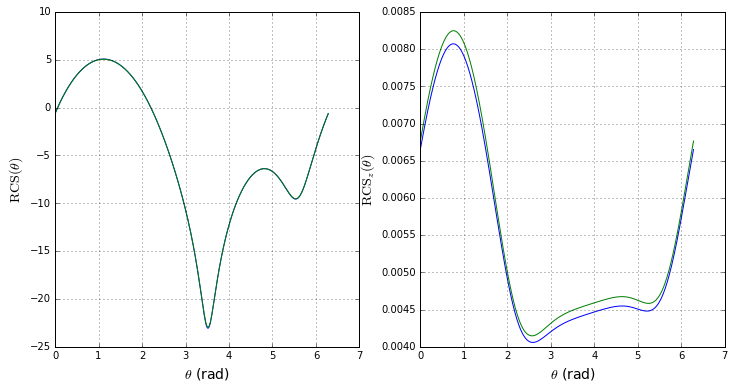

In [31]:
from matplotlib import pyplot as plt

fig, (ax1, ax2)  = plt.subplots(1,2, figsize=(12,6))

cs = 10 * np.log10(4 * np.pi * np.abs(Umean)**2)
cs1 = 10 * np.log10(4 * np.pi * np.abs(Umean1)**2)

ax1.plot(angles, cs)
ax1.plot(angles, cs1)


y = np.sqrt(np.abs(Uvar))
y1 = np.sqrt(np.abs(Uvar1))

#y = 10 * np.log10(4 * np.pi * y **2)
#y1 = 10 * np.log10(4 * np.pi * y1 ** 2)
ax2.plot(angles, y)
ax2.plot(angles, y1)


ax2.set_xlabel(r'$\theta$ (rad)', fontsize=14)
ax2.set_ylabel(r'$\mathrm{RCS}_z(\theta)$', fontsize=14)


ax1.set_xlabel(r'$\theta$ (rad)', fontsize=14)
ax1.set_ylabel(r'$\mathrm{RCS}(\theta)$', fontsize=14)

ax1.legend()
ax1.grid()

ax2.legend()
ax2.grid()

#ax2.set_ylim(0, 0.013)
plt.show(block=False)
